## Naive Bayes

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df=pd.read_excel(r"C:\Users\ADMIN\Downloads\Social_Network_Ads.xlsx")
df

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0
...,...,...,...
279,46,41000,1
280,51,23000,1
281,50,20000,1
282,36,33000,0


In [45]:
age=df.iloc[:,0].values
sal=df.iloc[:,1].values
y=df.iloc[:,-1].values

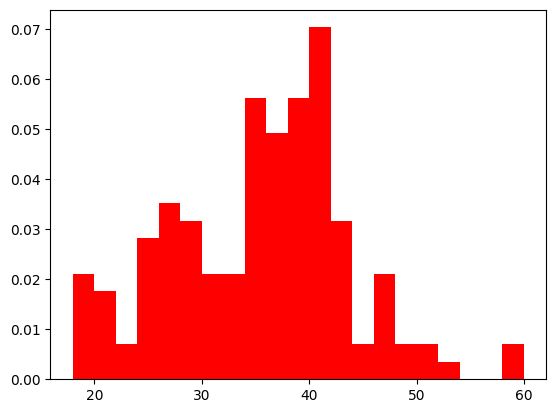

In [46]:
plt.hist(age[y==0],color='red',bins=np.arange(18,61,2),density=True);

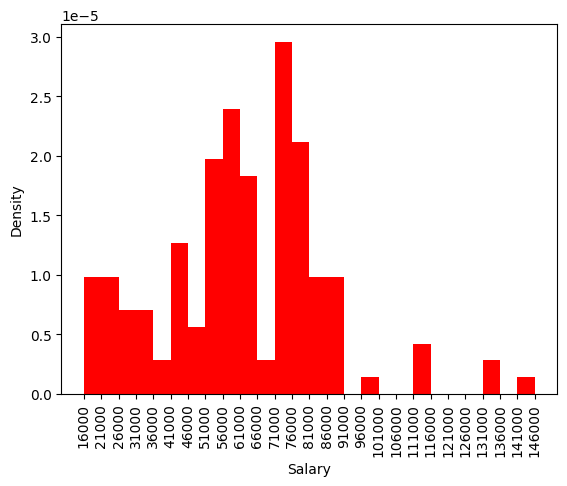

In [47]:
plt.hist(sal[y==0],color='red',bins=np.arange(16000,150000,5000),density=True);
plt.xlabel('Salary');
plt.ylabel('Density');
plt.xticks(np.arange(16000,150001,5000),rotation=90);

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X=df.iloc[:,[0,1]].values
y=df.iloc[:,-1].values
sc = StandardScaler()
X_sc = sc.fit_transform(X)


In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=0)

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model=GaussianNB()
model.fit(X_train,y_train).score(X_test,y_test)

0.8947368421052632

In [53]:
#age==45 and sal==150000

y_pred=model.predict(sc.transform(np.array(45,100000)))

TypeError: Cannot interpret '100000' as a data type

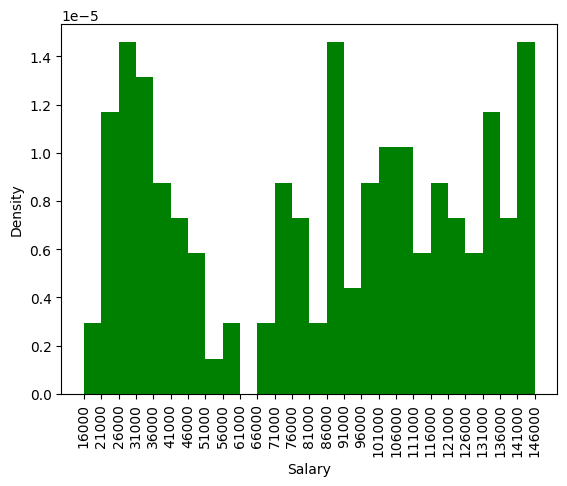

In [54]:
plt.hist(sal[y==1],color='green',bins=np.arange(16000,150000,5000),density=True);
plt.xlabel('Salary');
plt.ylabel('Density');
plt.xticks(np.arange(16000,150001,5000),rotation=90);

In [55]:
#probablity of purchase 
#np.log(prob of pur)+(prob of pur|age=45)
np.log(0.5)+np.log(0.025)+np.log(0.00)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_262708\3852229544.py:3: RuntimeWarning: divide by zero encountered in log
  np.log(0.5)+np.log(0.025)+np.log(0.00)


-inf

### do hw to make contour

## LDA and QDA

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [57]:
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train).score(X_test,y_test)

0.8070175438596491

(a classifer with quadratic)( multiple dimension )
internally uses byes theorum

In [58]:
model=QuadraticDiscriminantAnalysis()
model.fit(X_train,y_train).score(X_test,y_test)

0.9298245614035088

homework plot the LDA and QDA contour plot

## AdaBoost

In [59]:
(np.log(4))/2

0.6931471805599453

In [60]:
1/5*(np.exp(0.693))

0.3999411321082328

In [61]:
0.1/0.799

0.1251564455569462

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=5)
model.fit(X_train,y_train).score(X_test,y_test)

0.8596491228070176

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [65]:
# model=AdaBoostClassifier(base_estimator=SVC(kernel='linear'),n_estimators=5,probablity=True)
# model.fit(X_train,y_train).score(X_test,y_test)

## Stacking Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [73]:
estimator_list=[('DT',DecisionTreeClassifier(criterion='entropy')),
                 ('NB',GaussianNB()),
                 ('KNN',KNeighborsClassifier(n_neighbors=11))]

In [74]:
model=StackingClassifier(estimators=estimator_list)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9122807017543859